# Contents
1. [Data Cleaning](#1.-Data-Cleaning)
2. [EDA](#2.-EDA)
3. [Preprocessing](#3.-Preprocessing)

In [41]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# python magic to display matplolib plots in the notebook
%matplotlib inline

## 1. Data Cleaning

In [42]:
# import raw tweets dataframe
df = pd.read_csv('./data/tweets_scrape_first_df.csv')

#### Initial Inspection

In [43]:
# check the first five rows
df.head()

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
0,267716394043465728,2012-11-11 14:52:16,NaN,False,False,NaN,0.0,0.0,0.0,ConEd : NY Sandy power outages slip; costs...,/RealJezzy/status/267716394043465728,504279674.0,RealJezzy
1,298660085255770112,2013-02-05 00:11:27,NaN,False,False,NaN,0.0,0.0,0.0,@ ConEdison \n Power outage in queens,/meirBGNY/status/298660085255770112,909594764.0,meirBGNY
2,21860028236,2010-08-22 17:33:44,NaN,False,False,NaN,0.0,0.0,0.0,Power outage in the Whitestone section of Q...,/olgushka1/status/21860028236,68886571.0,olgushka1
3,1069021302667833344,2018-12-01 19:11:54,NaN,False,False,NaN,0.0,1.0,0.0,about that power outage that is now over.....,/jimcasale/status/1069021302667833344,12393522.0,jimcasale
4,767077182124486656,2016-08-20 15:13:46,NaN,False,False,NaN,3.0,0.0,7.0,.@ConEdison is responding to a power outag...,/NotifyNYC/status/767077182124486656,16145875.0,NotifyNYC


In [44]:
# check all column names
df.columns

Index(['ID', 'datetime', 'has_media', 'is_reply', 'is_retweet', 'medias',
       'nbr_favorite', 'nbr_reply', 'nbr_retweet', 'text', 'url', 'user_id',
       'usernameTweet'],
      dtype='object')

In [45]:
# look at some basic dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4375 entries, 0 to 4374
Data columns (total 13 columns):
ID               4375 non-null object
datetime         4375 non-null object
has_media        150 non-null object
is_reply         4375 non-null object
is_retweet       4374 non-null object
medias           149 non-null object
nbr_favorite     4374 non-null float64
nbr_reply        4374 non-null float64
nbr_retweet      4374 non-null float64
text             4374 non-null object
url              4373 non-null object
user_id          4373 non-null float64
usernameTweet    4373 non-null object
dtypes: float64(4), object(9)
memory usage: 444.4+ KB


In [46]:
df.describe()

,nbr_favorite,nbr_reply,nbr_retweet,user_id
count,4374.000000,4374.000000,4374.000000,4.373000e+03
mean,0.941015,0.368999,1.636488,1.905119e+16
std,14.724863,2.857402,6.094350,1.283920e+17
min,0.000000,0.000000,0.000000,4.180000e+02
25%,0.000000,0.000000,0.000000,1.673217e+07
50%,0.000000,0.000000,0.000000,6.350043e+07
75%,0.000000,0.000000,1.000000,3.748954e+08
max,956.000000,163.000000,271.000000,1.104817e+18


In [47]:
# inspect datatypes
df.dtypes

ID                object
datetime          object
has_media         object
is_reply          object
is_retweet        object
medias            object
nbr_favorite     float64
nbr_reply        float64
nbr_retweet      float64
text              object
url               object
user_id          float64
usernameTweet     object
dtype: object

#### Converting 'datetime' column to datetime format

In [48]:
# converting the datetime column to datetime format
# won't work because there there not all of the cells are formatted correctly

## pd.to_datetime(df['datetime']).head()
## returns 'ValueError: month must be in 1..12'

In [49]:
# locate the datetime value that is not in the correct format
for i in df.datetime:
    if i[5:7] not in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
        print(i)

/Maggie4Obama/status/108170030474203136


In [50]:
# look at the row
df[df.datetime == '/Maggie4Obama/status/108170030474203136']

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
2808,@ConEdison Why are there no updates regarding...,/Maggie4Obama/status/108170030474203136,20567184,Maggie4Obama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# inspect the item
df.iloc[2808]

ID               @ConEdison  Why are there no updates regarding...
datetime                   /Maggie4Obama/status/108170030474203136
has_media                                                 20567184
is_reply                                              Maggie4Obama
is_retweet                                                     NaN
medias                                                         NaN
nbr_favorite                                                   NaN
nbr_reply                                                      NaN
nbr_retweet                                                    NaN
text                                                           NaN
url                                                            NaN
user_id                                                        NaN
usernameTweet                                                  NaN
Name: 2808, dtype: object

In [52]:
# drop that row since it is mostly bad data
df.drop(index=2808, inplace=True)

In [53]:
# try converting the 'datetime' column to datetime again
df.datetime = pd.to_datetime(df.datetime)

In [54]:
# check that it worked
df.dtypes

ID                       object
datetime         datetime64[ns]
has_media                object
is_reply                 object
is_retweet               object
medias                   object
nbr_favorite            float64
nbr_reply               float64
nbr_retweet             float64
text                     object
url                      object
user_id                 float64
usernameTweet            object
dtype: object

In [55]:
# sort the dataframe so that it is in chronological order
df.sort_values('datetime', inplace=True)

# and reset the index
df.reset_index(inplace=True)

#### Addressing Null Values

In [56]:
# check nulls
df.isnull().sum()

index               0
ID                  0
datetime            0
has_media        4225
is_reply            0
is_retweet          0
medias           4225
nbr_favorite        0
nbr_reply           0
nbr_retweet         0
text                0
url                 1
user_id             1
usernameTweet       1
dtype: int64

In [57]:
# impute 'no media' for the null media columns
df['has_media'] = df.has_media.fillna('no media')
df['medias'] = df.has_media.fillna('no media')
df.isnull().sum()

index            0
ID               0
datetime         0
has_media        0
is_reply         0
is_retweet       0
medias           0
nbr_favorite     0
nbr_reply        0
nbr_retweet      0
text             0
url              1
user_id          1
usernameTweet    1
dtype: int64

In [58]:
#check out the null url
df[df.url.isnull()]

,index,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
656,2807,108170030474203136,2011-08-29 09:31:59,no media,False,False,no media,0.0,0.0,0.0,TomSmolka Tom Smolka,NaN,NaN,NaN


In [59]:
# drop that row since it is mostly bad data
# and also addresses the nulls for user_id and usernameTweet
df.drop(index=2807, inplace=True)

In [60]:
# check that all the nulls have been addressed
df.isnull().sum()

index            0
ID               0
datetime         0
has_media        0
is_reply         0
is_retweet       0
medias           0
nbr_favorite     0
nbr_reply        0
nbr_retweet      0
text             0
url              1
user_id          1
usernameTweet    1
dtype: int64

## 2. EDA

#### Duplicate Values
We want to look at how many duplicate values are present in each column, to get a sense of the diversity of the collection of tweets. We don't want too duplicate values.

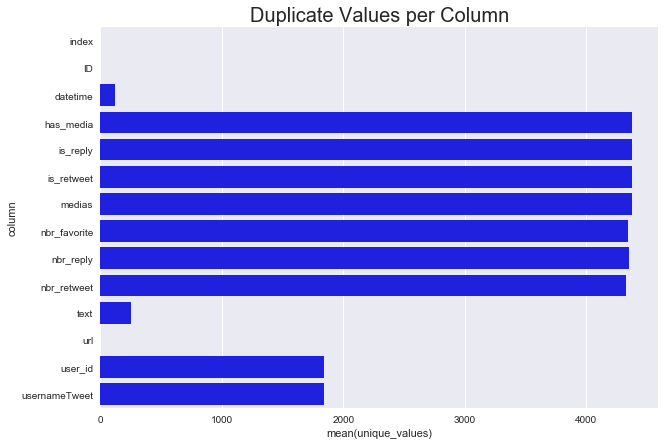

In [61]:
# create a dataframe of all duplicate values
unique = []
for i in df.columns:
    uniques = {}
    uniques['column'] = i 
    uniques['unique_values'] = len(df) - df[i].nunique()
    unique.append(uniques)
unique_df = pd.DataFrame(unique)

# plot the dataframe
plt.figure(figsize=(10, 7))
sns.barplot(x = unique_df.unique_values, 
            y = unique_df.column,
            color = 'b')
plt.title('Duplicate Values per Column', fontsize=20);

In [62]:
df.user_id.nunique()

2533

Columns that contain mainly duplicates turn out to be unsurprising. They are either binary distributions (like 'is_reply') or mostly zeroes (like 'nbr_retweet').

The primary insight from this is that even though we have 4,373 tweets, we have only 2,533 unique authors of the tweets. We looked into this further:

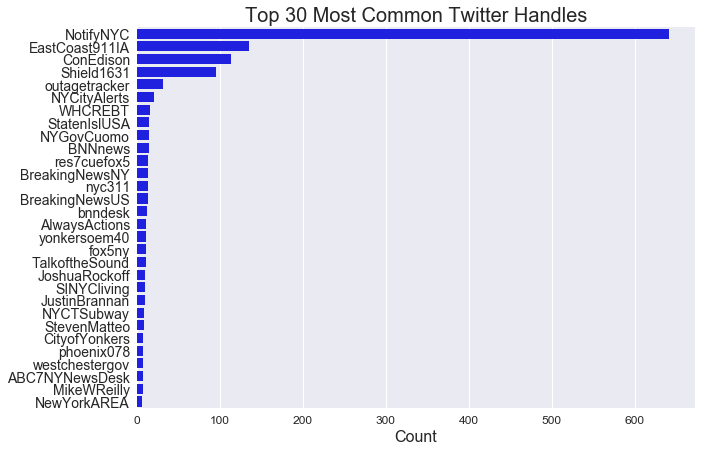

In [63]:
common_handles = zip(df.usernameTweet.value_counts()[:30].index.values, df.usernameTweet.value_counts()[:30].values)
x = pd.DataFrame(common_handles, columns=['handle', 'count'])


plt.figure(figsize=(10, 7))
sns.barplot(y = x['handle'], 
            x = x['count'],
            color = 'b')
plt.title('Top 30 Most Common Twitter Handles', fontsize=20)
plt.xlabel('Count', fontsize=16)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks(fontsize=12);

In [64]:
len(df[df.usernameTweet == 'NotifyNYC'])

641

#### Considering The Most Common Twitter Authors (Handles)
There are many handles that have multiple tweets. These include official handles and news organizations. The most common handle, by far, is @NotifyNYC, with 641 tweets.

We will want to consider using some of these as target indicators, particularly those that are official handles that are sharing information the utility would likely already know about.  

We will also want to consider extracting these from the dataframe before parsing for language, since they're likely to bias any model looking for common language (i.e. many of the tweets from NotifyNYC follow a format along the lines of "@Conedison is responding to a power outage in {zip-code}).

In [65]:
df[df.usernameTweet == 'NotifyNYC'].head(1)

,index,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
8,1959,4893616711,2009-10-15 13:21:40,no media,False,False,no media,0.0,0.0,0.0,ConEd responding to a power outage in the...,/NotifyNYC/status/4893616711,16145875.0,NotifyNYC


It turns out that many groups copy and share tweets from @NotifyNYC. Of the tweets collected, almost all of the tweets from two of the top three handles after @NotifyNYC, @EastCoast911A and @Shield1631, are copies of NotifyNYC tweets. 

*Note: We discovered at this time that the 'is_retweet' column had no positive values, possibly due to limitations with the scraper, so we were unable to leverage that column as a means to remove duplicates.*

In [66]:
df[df.usernameTweet == 'EastCoast911IA'][:1]

,index,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
3003,1160,739603458937004032,2016-06-05 19:43:00,no media,False,False,no media,0.0,0.0,0.0,NotifyNYC: .ConEdison is responding to a powe...,/EastCoast911IA/status/739603458937004032,2.778990e+09,EastCoast911IA


In [67]:
df[df.usernameTweet == 'Shield1631'].head(1)

,index,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
3412,2594,868210315300933637,2017-05-26 17:00:44,no media,False,False,no media,1.0,0.0,1.0,NYC: ConED reporting a large power outage...,/Shield1631/status/868210315300933637,3.493897e+09,Shield1631


These are duplicate tweets, so we want to exclude them from our analysis. Below we accomplish this using various masks to identify the retweets and systematically pair down the dataframe. 

#### Removing @NotifyNYC Tweets (641 tweets)

In [70]:
# first, extract NotifyNYC so that we can use those tweets later, if we need them
df_with_only_NotifyNYC = df[df.usernameTweet == 'NotifyNYC']

# save that to a csv
df_with_only_NotifyNYC.to_csv('NotifyNYC_tweets.csv')

# and create a dataframe without NotifyNYC that can be paired down
df_without_NotifyNYC = df[df.usernameTweet != 'NotifyNYC']

# print out the top twitter handles after removing the retweets
print(df_without_NotifyNYC.usernameTweet.value_counts()[:5])

EastCoast911IA    135
ConEdison         113
Shield1631         95
outagetracker      31
NYCityAlerts       20
Name: usernameTweet, dtype: int64


#### Removing Tweets that contain the term 'NotifyNYC' (361 tweets)

In [71]:
# create a mask to identify "retweets" of NotifyNYC
retweets_notify = df_without_NotifyNYC.text.str.contains('NotifyNYC')

# print the number of tweets in the mask
print(f'{len(df_without_NotifyNYC[retweets_notify])} retweets in the mask')
print('')

# save a new dataframe that excludes these tweets
df_without_notify_retweets = df_without_NotifyNYC[~retweets_notify]

# print out the top twitter handles after removing the retweets
print(df_without_notify_retweets.usernameTweet.value_counts()[:5])

361 retweets in the mask

ConEdison        113
Shield1631        95
outagetracker     28
NYCityAlerts      19
StatenIslUSA      14
Name: usernameTweet, dtype: int64


#### Removing @Shield1631 Tweets (95 copies of @NotifyNYC tweets)

In [72]:
# create a mask to identify "retweets" of NotifyNYC
# noting that every 'Shild1631' tweet in our dataframe was a NotifyNYC retweet
retweets_notify = df_without_NotifyNYC.usernameTweet == 'Shield1631'

# print the number of tweets in the mask
print(f'{len(df_without_notify_retweets[retweets_notify])} retweets in the mask')
print('')

# save a new dataframe that excludes these tweets
df_without_notify_retweets = df_without_notify_retweets[~retweets_notify]

# print out the top twitter handles after removing the retweets
print(df_without_notify_retweets.usernameTweet.value_counts()[:5])

95 retweets in the mask

ConEdison        113
outagetracker     28
NYCityAlerts      19
NYGovCuomo        14
BNNnews           14
Name: usernameTweet, dtype: int64


/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [73]:
# create a mask to identify "retweets" of NotifyNYC
# taking advantage of the strange character spacing in some of the tweets
retweets_notify = df_without_notify_retweets.text.str.contains('is responding to a  p')

# print the number of tweets in the mask
print(f'{len(df_without_notify_retweets[retweets_notify])} retweets in the mask')
print('')

# save a new dataframe that excludes these tweets
df_without_notify_retweets = df_without_notify_retweets[~retweets_notify]

# print out the top twitter handles after removing the retweets
print(df_without_notify_retweets.usernameTweet.value_counts()[:5])

57 retweets in the mask

ConEdison        113
outagetracker     28
NYCityAlerts      19
NYGovCuomo        14
BNNnews           14
Name: usernameTweet, dtype: int64


In [75]:
len(df_without_notify_retweets)

3219

# Pre-Processing

### TweetTokenize and Lemmatize all of the Titles

In [31]:
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords
import re

In [32]:
def tweets_to_words(raw_tweets):
    # Function to convert a tweet to a string of words
    
    # 1. Remove HTML.
    post_text = BeautifulSoup(raw_tweets).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", post_text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.split()
    
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords.words('english')) 
    extra = ['http','https','www','com','@','...','…', 'bit', 'ly', 'rt']
    # 5. Remove stop words.
    meaningful_words = [word for word in words if not word in stops and word not in extra]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [33]:
# # Get the number of tweets based on the dataframe size.
# total_tweets = X.shape[0]
# print(f'There are {total_tweets} tweets.')

# # Initialize an empty list to hold the clean tweets.
# clean_X = []

In [34]:
df_without_notify_retweets['regex_clean_tweets'] = df_without_notify_retweets.text.apply(tweets_to_words)

In [35]:
# import tokenizer and stemmer
from nltk import word_tokenize, TweetTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [36]:
# define a function that takes in a tweet
# and tokenizes and stems that tweet
def stem_tweet(tweet):    
    stm = PorterStemmer()
    tokenized = word_tokenize(tweet)
    stem_tokes = []
    for toke in tokenized:
        stem_tokes.append(stm.stem(toke))
    stem_tokes

    comb = ''
    for stemmed in stem_tokes:
        comb += stemmed + ' '
    return comb

# define a function that takes in a tweet
# and tweet_tokenizes and lemmatizes that tweet
def lem_tweet(tweet):    
    lem = WordNetLemmatizer()
    tokenizer = TweetTokenizer()
    tokenized = tokenizer.tokenize(tweet)
    lemmed_tokes = []
    for toke in tokenized:
        lemmed_tokes.append(lem.lemmatize(toke))
    lemmed_tokes

    comb = ''
    for lemmed in lemmed_tokes:
        comb += lemmed + ' '
    return comb

In [37]:
# check that the function works
lem_tweet(df_without_notify_retweets.regex_clean_tweets[3])

'power outage From Verizon The commercial power issue area may cleared If still issue Verizon service click From ConEdison '

In [38]:
# create a new column by applying the function to the title column
# and check out the head to see if it worked
df_without_notify_retweets['lemmed_tweet'] = df_without_notify_retweets.regex_clean_tweets.apply(lem_tweet)
df_without_notify_retweets.head()

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet,regex_clean_tweets,lemmed_tweet
0,267716394043465728,2012-11-11 14:52:16,no media,False,False,no media,0.0,0.0,0.0,ConEd : NY Sandy power outages slip; costs...,/RealJezzy/status/267716394043465728,504279674.0,RealJezzy,ConEd NY Sandy power outages slip costs could ...,ConEd NY Sandy power outage slip cost could re...
1,298660085255770112,2013-02-05 00:11:27,no media,False,False,no media,0.0,0.0,0.0,@ ConEdison \n Power outage in queens,/meirBGNY/status/298660085255770112,909594764.0,meirBGNY,ConEdison Power outage queens,ConEdison Power outage queen
2,21860028236,2010-08-22 17:33:44,no media,False,False,no media,0.0,0.0,0.0,Power outage in the Whitestone section of Q...,/olgushka1/status/21860028236,68886571.0,olgushka1,Power outage Whitestone section Queens To repo...,Power outage Whitestone section Queens To repo...
3,1069021302667833344,2018-12-01 19:11:54,no media,False,False,no media,0.0,1.0,0.0,about that power outage that is now over.....,/jimcasale/status/1069021302667833344,12393522.0,jimcasale,power outage From Verizon The commercial power...,power outage From Verizon The commercial power...
5,262590240374550528,2012-10-28 12:22:46,no media,False,False,no media,0.0,0.0,0.0,How to report a power outage (& you should...,/EastchesterEMS/status/262590240374550528,321410001.0,EastchesterEMS,How report power outage ConEd coned videos ind...,How report power outage ConEd coned video inde...


In [39]:
# check out the tail, too
df_without_notify_retweets.tail()

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet,regex_clean_tweets,lemmed_tweet
4367,337934949967597571,2013-05-24 10:15:45,no media,False,False,no media,0.0,0.0,0.0,Anyone experiencing power loss on #Roosevelt...,/SenatorSerrano/status/337934949967597571,3.695740e+07,SenatorSerrano,Anyone experiencing power loss RooseveltIsland...,Anyone experiencing power loss RooseveltIsland...
4369,266333200966623232,2012-11-07 19:15:58,no media,False,False,no media,0.0,0.0,3.0,RT @kmbtweets : RT @SINYCliving : Power out...,/SINYCliving/status/266333200966623232,1.524081e+08,SINYCliving,RT kmbtweets RT SINYCliving Power outages repo...,RT kmbtweets RT SINYCliving Power outage repor...
4371,264374015714553858,2012-11-02 10:30:51,no media,True,False,no media,0.0,0.0,1.0,@ hhertzof Please check out our outage map ...,/ConEdison/status/264374015714553858,2.026208e+07,ConEdison,hhertzof Please check outage map ow eYgQG Scho...,hhertzof Please check outage map ow eYgQG Scho...
4372,308557748671479808,2013-03-04 07:41:14,no media,False,False,no media,0.0,1.0,0.0,@ ConEdison Partial power outage in Green...,/curlycakes/status/308557748671479808,2.760942e+08,curlycakes,ConEdison Partial power outage Greenwood Brook...,ConEdison Partial power outage Greenwood Brook...
4373,969704423621648384,2018-03-02 17:42:05,no media,False,False,no media,0.0,1.0,0.0,"Just out of curiosity @EversourceCT , will the...",/yelenadasher/status/969704423621648384,2.791989e+09,yelenadasher,Just curiosity EversourceCT ever power outage ...,Just curiosity EversourceCT ever power outage ...


In [40]:
#df_without_notify_retweets.to_csv('working_df_without_retweets.csv')

## Model Prep

### CountVectorize from Unlemmed

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
# Instantiate
cv = CountVectorizer(stop_words='english', 
                     ngram_range=(1,1)
                    )

In [43]:
# Fit and Transform
sparse_df_unlemmed = cv.fit_transform(df_without_notify_retweets.text)

In [44]:
dense_df_unlemmed = pd.DataFrame(sparse_df_unlemmed.todense(), columns=cv.get_feature_names())
dense_df_unlemmed.head()

,00,000,0004cd37823361e17f570,0025,004681,0075,008,00am,00pm,01,...,zq1l1q,zq77qw,zqccse,zrhytqylft,zup9nhrybuektc1lcewgbpjqjpebeptl,zup9nhrybuhm1ks2tvqbgrdi67_ocwsu,zuqbnywg1dl,zxutv,zzwxbkvgxy,うちはまだ停電してないだけましらしい
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
len(cv.get_feature_names())

6774

### CountVectorize from Lemmed

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
# Instantiate
cv = CountVectorizer(stop_words='english', 
                     ngram_range=(1,1)
                    )

In [48]:
# Fit and Transform
sparse_df_lemmed = cv.fit_transform(df_without_notify_retweets.lemmed_tweet)

In [49]:
dense_df_lemmed = pd.DataFrame(sparse_df_lemmed.todense(), columns=cv.get_feature_names())
dense_df_lemmed.head()

,aaa,aaaa,aaaaaaand,aacel,abb,abbgroupnews,abc,abiwrightny,able,abqxzo,...,zup,zuqbnywg,zv,zwk,zxutv,zy,zyqz,zysed,zyzm,zzwxbkvgxy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [50]:
len(cv.get_feature_names())

5750

In [51]:
cv.get_feature_names()[6000:6008]

[]

## Clustering

In [52]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
km = KMeans(n_clusters=3, random_state=42)

In [53]:
X_sc = ss.fit_transform(dense_df_lemmed)
km.fit(X_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [54]:
from sklearn.metrics import silhouette_score

In [55]:
silhouette_score(X_sc, km.labels_)

0.03003603731177982

In [56]:
sum(km.labels_ == 0)

5

In [57]:
sum(km.labels_ == 1)

3

In [58]:
sum(km.labels_ == 2)

3211

# Spacy Processing

In [59]:
import spacy
nlp = spacy.load('en')
doc1 = nlp(df_without_notify_retweets.lemmed_tweet[2])
print(doc1)

Power outage Whitestone section Queens To report loss electric service contact Con Edison CONED 


## Part-of-Speech Tagging

In [60]:
# check out what this can do

for token in doc1:
    print('{} - {}'.format(token, token.pos_))

Power - NOUN
outage - NOUN
Whitestone - PROPN
section - NOUN
Queens - PROPN
To - PART
report - VERB
loss - NOUN
electric - ADJ
service - NOUN
contact - NOUN
Con - PROPN
Edison - PROPN
CONED - PROPN


#### Extract Nouns from Tweets

In [61]:
# define a function to extract a tweet's nouns 
# and return them in a single string,
# so that the string can then be added back into the dataframe

def extract_NOUN(tweet):
    doc = nlp(tweet)
    NOUNS = []
    for token in doc:
        if token.pos_ == 'NOUN':
            NOUNS.append(str(token))   
    #print(NOUNS)
    comb = ''
    for token in NOUNS:
        comb += token + ' '
    return comb

In [62]:
# test out the function

extract_NOUN(df_without_notify_retweets.lemmed_tweet[0])

'power outage slip cost dlvr H '

In [63]:
# apply the function to every lemmed tweet to create a new 'nouns' column

df_without_notify_retweets['nouns'] = df_without_notify_retweets.lemmed_tweet.apply(extract_NOUN)
df_without_notify_retweets.head()

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet,regex_clean_tweets,lemmed_tweet,nouns
0,267716394043465728,2012-11-11 14:52:16,no media,False,False,no media,0.0,0.0,0.0,ConEd : NY Sandy power outages slip; costs...,/RealJezzy/status/267716394043465728,504279674.0,RealJezzy,ConEd NY Sandy power outages slip costs could ...,ConEd NY Sandy power outage slip cost could re...,power outage slip cost dlvr H
1,298660085255770112,2013-02-05 00:11:27,no media,False,False,no media,0.0,0.0,0.0,@ ConEdison \n Power outage in queens,/meirBGNY/status/298660085255770112,909594764.0,meirBGNY,ConEdison Power outage queens,ConEdison Power outage queen,outage queen
2,21860028236,2010-08-22 17:33:44,no media,False,False,no media,0.0,0.0,0.0,Power outage in the Whitestone section of Q...,/olgushka1/status/21860028236,68886571.0,olgushka1,Power outage Whitestone section Queens To repo...,Power outage Whitestone section Queens To repo...,Power outage section loss service contact
3,1069021302667833344,2018-12-01 19:11:54,no media,False,False,no media,0.0,1.0,0.0,about that power outage that is now over.....,/jimcasale/status/1069021302667833344,12393522.0,jimcasale,power outage From Verizon The commercial power...,power outage From Verizon The commercial power...,power outage power issue area service click
5,262590240374550528,2012-10-28 12:22:46,no media,False,False,no media,0.0,0.0,0.0,How to report a power outage (& you should...,/EastchesterEMS/status/262590240374550528,321410001.0,EastchesterEMS,How report power outage ConEd coned videos ind...,How report power outage ConEd coned video inde...,power outage video index bcpid bckey tVqBGRDi ...


#### Extract Proper Nouns from Tweets

In [64]:
# define a function to extract a tweet's proper nouns 
# and return them in a single string,
# so that the string can then be added back into the dataframe

def extract_PROPN(tweet):
    doc = nlp(tweet)
    PROPN = []
    for token in doc:
        if token.pos_ == 'PROPN':
            PROPN.append(str(token))   
    #print(PROPN)
    comb = ''
    for token in PROPN:
        comb += token + ' '
    return comb

In [65]:
# test the function
extract_PROPN(df_without_notify_retweets.lemmed_tweet[0])

'ConEd NY Sandy Sss '

In [66]:
# apply the function to every lemmed tweet to create a new 'proper_nouns' column
df_without_notify_retweets['proper_nouns'] = df_without_notify_retweets.lemmed_tweet.apply(extract_PROPN)
df_without_notify_retweets.head()

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet,regex_clean_tweets,lemmed_tweet,nouns,proper_nouns
0,267716394043465728,2012-11-11 14:52:16,no media,False,False,no media,0.0,0.0,0.0,ConEd : NY Sandy power outages slip; costs...,/RealJezzy/status/267716394043465728,504279674.0,RealJezzy,ConEd NY Sandy power outages slip costs could ...,ConEd NY Sandy power outage slip cost could re...,power outage slip cost dlvr H,ConEd NY Sandy Sss
1,298660085255770112,2013-02-05 00:11:27,no media,False,False,no media,0.0,0.0,0.0,@ ConEdison \n Power outage in queens,/meirBGNY/status/298660085255770112,909594764.0,meirBGNY,ConEdison Power outage queens,ConEdison Power outage queen,outage queen,ConEdison Power
2,21860028236,2010-08-22 17:33:44,no media,False,False,no media,0.0,0.0,0.0,Power outage in the Whitestone section of Q...,/olgushka1/status/21860028236,68886571.0,olgushka1,Power outage Whitestone section Queens To repo...,Power outage Whitestone section Queens To repo...,Power outage section loss service contact,Whitestone Queens Con Edison CONED
3,1069021302667833344,2018-12-01 19:11:54,no media,False,False,no media,0.0,1.0,0.0,about that power outage that is now over.....,/jimcasale/status/1069021302667833344,12393522.0,jimcasale,power outage From Verizon The commercial power...,power outage From Verizon The commercial power...,power outage power issue area service click,Verizon Verizon ConEdison
5,262590240374550528,2012-10-28 12:22:46,no media,False,False,no media,0.0,0.0,0.0,How to report a power outage (& you should...,/EastchesterEMS/status/262590240374550528,321410001.0,EastchesterEMS,How report power outage ConEd coned videos ind...,How report power outage ConEd coned video inde...,power outage video index bcpid bckey tVqBGRDi ...,ConEd AQ AAAA ijeYFE Zup nhRYBuHm KS Live ConEd


## Noun-Phrase-Chunking

In [67]:
for chunk in doc1.noun_chunks:
    print('{} - {}'.format(chunk, chunk.label_))

Power outage Whitestone section - NP
Queens - NP
loss electric service contact Con Edison CONED - NP


#### Extract Noun Phrase Chunks from Tweets

In [68]:
for tweet in df_without_notify_retweets.lemmed_tweet[:30]:
    #print(nlp(i))
    doc = nlp(tweet)
    NP = []
    for chunk in doc.noun_chunks:
        NP.append(str(chunk))   
    print(NP)

['ConEd NY Sandy power outage slip cost', 'million dlvr', 'Sss H']
['ConEdison Power outage queen']
['Power outage Whitestone section', 'Queens', 'loss electric service contact Con Edison CONED']
['power outage', 'Verizon', 'The commercial power issue area', 'Verizon service', 'ConEdison']
['How report power outage', 'ConEd', 'video index', 'bcpid bckey AQ AAAA ijeYFE Zup nhRYBuHm KS', 'ocWsu bclid bctid', 'Live ConEd outage map reference apps coned stormcenter', 'ex ternal default html']
['ConEdison major power outage Harrison NY']
['Handy Sandy Maps ConEd power shutdown warning map google map', 'm msa msid cd', 'e', 'UTF', 'z source', 'Current ConEd outage apps', 'coned stormcenter', 'ex ternal default html']
['Manhattan Power Outages', 'fb', 'eF N']
['Helpful link ConEdison service outage map', 'coned stormcenter', 'ex ternal default html', 'Power', 'restoration time', 'much Manhattan']
['i', 'infrastructure']
['ConEd reporting power outage Queens Sandy']
['ConEdison', 'friend', 'st

## Named-Entity-Recognition

In [69]:
for ent in doc1.ents:
    print(ent.text, '-', ent.label_)

Whitestone - GPE
Queens - ORG
Con Edison CONED - PERSON


#### Create a new column that contains Geopolitical Entities from Tweets

In [70]:
# define a function that takes in a tweet and returns a single string
# that contains only the Geopolitical Entities from that tweet
def extract_GPE(tweet):
    doc = nlp(tweet)
    GPE = []
    for ent in doc.ents:
        if ent.label_ == 'GPE':
            GPE.append(str(ent.text))   
    #print(GPE)
    comb = ''
    for token in GPE:
        comb += token + ' '
    return comb

In [71]:
# check that the function works
extract_GPE(df_without_notify_retweets.lemmed_tweet[0])

''

In [72]:
# apply the function to every lemmed tweet to create a new 'geopolitical_ents' column
df_without_notify_retweets['geopolitical_ents'] = df_without_notify_retweets.lemmed_tweet.apply(extract_GPE)
df_without_notify_retweets.head()

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet,regex_clean_tweets,lemmed_tweet,nouns,proper_nouns,geopolitical_ents
0,267716394043465728,2012-11-11 14:52:16,no media,False,False,no media,0.0,0.0,0.0,ConEd : NY Sandy power outages slip; costs...,/RealJezzy/status/267716394043465728,504279674.0,RealJezzy,ConEd NY Sandy power outages slip costs could ...,ConEd NY Sandy power outage slip cost could re...,power outage slip cost dlvr H,ConEd NY Sandy Sss,
1,298660085255770112,2013-02-05 00:11:27,no media,False,False,no media,0.0,0.0,0.0,@ ConEdison \n Power outage in queens,/meirBGNY/status/298660085255770112,909594764.0,meirBGNY,ConEdison Power outage queens,ConEdison Power outage queen,outage queen,ConEdison Power,
2,21860028236,2010-08-22 17:33:44,no media,False,False,no media,0.0,0.0,0.0,Power outage in the Whitestone section of Q...,/olgushka1/status/21860028236,68886571.0,olgushka1,Power outage Whitestone section Queens To repo...,Power outage Whitestone section Queens To repo...,Power outage section loss service contact,Whitestone Queens Con Edison CONED,Whitestone
3,1069021302667833344,2018-12-01 19:11:54,no media,False,False,no media,0.0,1.0,0.0,about that power outage that is now over.....,/jimcasale/status/1069021302667833344,12393522.0,jimcasale,power outage From Verizon The commercial power...,power outage From Verizon The commercial power...,power outage power issue area service click,Verizon Verizon ConEdison,Verizon Verizon
5,262590240374550528,2012-10-28 12:22:46,no media,False,False,no media,0.0,0.0,0.0,How to report a power outage (& you should...,/EastchesterEMS/status/262590240374550528,321410001.0,EastchesterEMS,How report power outage ConEd coned videos ind...,How report power outage ConEd coned video inde...,power outage video index bcpid bckey tVqBGRDi ...,ConEd AQ AAAA ijeYFE Zup nhRYBuHm KS Live ConEd,


### Dependency Parsing
Can we use this to get items like "Lighthouse Hill" that aren't recognized by Named-Entity-Recognition?

In [73]:
#df.lemmed_tweet[24]

In [74]:
# from spacy import displacy

# nlp = spacy.load("en_core_web_sm")
# doc = nlp(df.lemmed_tweet[24])
# displacy.render(doc, style='dep')

### Narrow timeframe to match weather

In [75]:
df_without_notify_retweets.shape

(3219, 18)

In [76]:
df_temp = df_without_notify_retweets.sort_values('datetime')
df_temp = df_temp.reset_index()
df_temp

,index,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet,regex_clean_tweets,lemmed_tweet,nouns,proper_nouns,geopolitical_ents
0,2597,159679592,2007-07-20 11:47:44,no media,False,False,no media,0.0,0.0,0.0,upset about power outage at Jango. ConEd ...,/mattiasstanghed/status/159679592,5.973102e+06,mattiasstanghed,upset power outage Jango ConEd needs get act t...,upset power outage Jango ConEd need get act to...,power outage act,Jango ConEd,
1,3010,821851312,2008-05-28 12:54:52,no media,True,False,no media,0.0,0.0,0.0,@ JonBurg We don't applaud ConEd for restor...,/awolk/status/821851312,8.297532e+06,awolk,JonBurg We applaud ConEd restoring power cause...,JonBurg We applaud ConEd restoring power cause...,power outage point,JonBurg ConEd,
2,3328,831579275,2008-06-10 15:24:02,no media,False,False,no media,0.0,0.0,0.0,Voice mail from ConEd says we're close to a ...,/schlchtmyr/status/831579275,1.466381e+06,schlchtmyr,Voice mail ConEd says close power outage Hey g...,Voice mail ConEd say close power outage Hey gu...,mail power outage guy turn jackhammer,Voice ConEd AC,
3,4202,864377956,2008-07-21 14:34:01,no media,False,False,no media,0.0,0.0,0.0,Neighborhood power outage . Goddamn ConEd ...,/corneilius/status/864377956,5.686132e+06,corneilius,Neighborhood power outage Goddamn ConEd This a...,Neighborhood power outage Goddamn ConEd This a...,Neighborhood power outage rivington st,Goddamn ConEd,
4,3811,1395303668,2009-03-26 12:29:56,no media,False,False,no media,0.0,0.0,0.0,Headed home early -- power outage at the o...,/deadlytango/status/1395303668,1.465168e+07,deadlytango,Headed home early power outage office Still mu...,Headed home early power outage office Still mu...,home power outage office Thanks,ConEd,
5,3573,1960011711,2009-05-29 10:16:30,no media,False,False,no media,0.0,0.0,0.0,@ wnyc has been having power outages this...,/macsamurai/status/1960011711,4.324300e+04,macsamurai,wnyc power outages morning according brianlehr...,wnyc power outage morning according brianlehre...,wnyc power outage morning brianlehrer pledge w...,,
6,4281,2422668339,2009-07-01 12:55:33,no media,False,False,no media,0.0,0.0,0.0,Now that I'm having people work in my home mor...,/brianalvey/status/2422668339,4.119021e+06,brianalvey,Now I people work home often ConEd outage No p...,Now I people work home often ConEd outage No p...,people outage power pm Losers,ConEd,
7,159,4484429286,2009-09-29 20:27:45,no media,False,False,no media,0.0,0.0,0.0,"Hates power outages , ConEd . Thinking abo...",/keledy/status/4484429286,9.550242e+06,keledy,Hates power outages ConEd Thinking using car w...,Hates power outage ConEd Thinking using car wh...,Hates power outage car alarm power source,ConEd Thinking,
8,2172,4893673114,2009-10-15 13:24:09,no media,False,False,no media,0.0,0.0,0.0,RT @NYCOEM : ConEd responding to a power ...,/bobtheastorian/status/4893673114,2.550778e+07,bobtheastorian,RT NYCOEM ConEd responding power outage Marine...,RT NYCOEM ConEd responding power outage Marine...,power outage neighborhood,RT NYCOEM ConEd Marine Park Brooklyn,Brooklyn
9,482,7068199124,2009-12-26 14:26:22,no media,False,False,no media,1.0,0.0,1.0,Show almost cancelled due to actual power o...,/Jay_A_Johnson/status/7068199124,9.486353e+07,Jay_A_Johnson,Show almost cancelled due actual power outage ...,Show almost cancelled due actual power outage ...,power outage LOVE,Show Oh ConEd,


In [77]:
df_2012_2017 = df_temp[(df_temp.datetime >= '2012-10-01') &  (df_temp.datetime <= '2017-10-28')]

In [78]:
df_2012_2017.tail()

,index,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet,regex_clean_tweets,lemmed_tweet,nouns,proper_nouns,geopolitical_ents
2636,920,912039347221880832,2017-09-24 15:41:39,no media,False,False,no media,0.0,1.0,0.0,@ ConEdison power outage - no AC - 16th S...,/victoriajbd/status/912039347221880832,5.281284e+07,victoriajbd,ConEdison power outage AC th St th th South Sl...,ConEdison power outage AC th St th th South Sl...,ConEdison power outage St degree,AC th South Slope,
2637,1499,919290626952196096,2017-10-14 15:55:39,no media,False,False,no media,0.0,0.0,0.0,Also - IIRC; residental + civil electricity ar...,/jackyalcine/status/919290626952196096,4.411945e+07,jackyalcine,Also IIRC residental civil electricity intertw...,Also IIRC residental civil electricity intertw...,electricity power outage affect hub,IIRC ConEd,
2638,2487,921738239450501120,2017-10-21 10:01:36,no media,True,False,no media,2.0,1.0,0.0,When ConEd had a power outage a while ag...,/LeeJenniferlee6/status/921738239450501120,2.157223e+09,LeeJenniferlee6,When ConEd power outage ago Customers reimbursed,When ConEd power outage ago Customers reimbursed,power outage,ConEd Customers,
2639,3417,922385492179644416,2017-10-23 04:53:33,no media,False,False,no media,0.0,1.0,0.0,@ ConEdison power outage in the 400 block...,/MSFATTY/status/922385492179644416,1.848563e+07,MSFATTY,ConEdison power outage block Pratt avenue,ConEdison power outage block Pratt avenue,ConEdison power outage block avenue,Pratt,
2640,644,922860705216331778,2017-10-24 12:21:52,no media,False,False,no media,0.0,2.0,0.0,@ ConEdison @ConEdSolutions tried to report ...,/AudreyBeerman/status/922860705216331778,2.724261e+07,AudreyBeerman,ConEdison ConEdSolutions tried report power ou...,ConEdison ConEdSolutions tried report power ou...,report power outage error message website powe...,ConEdison ConEdSolutions iW E,


In [79]:
# https://stackoverflow.com/questions/39805961/pandas-remove-seconds-from-datetime-index
df_2012_2017['datetime'] = df_2012_2017['datetime'].map(lambda x: x.replace(minute=0, second=0))

/Users/kevinc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
df_2012_2017.to_csv('./data/nlp_tweets_2012_2017.csv', index=False)

In [81]:
!ls data

OEM_Emergency_Notifications.csv   tweets_3.csv
OEM_Non_Outages.csv               tweets_pseg_dec13_sep20.csv
final_df.csv                      tweets_pseg_jun27_apr06.csv
final_df_full.csv                 tweets_pseg_sep6_july2
merged_weather_tweets.csv         tweets_scrape_first_df.csv
nlp_tweets.csv                    weather_outage_merge.csv
nlp_tweets_2012_2017.csv          weather_target_drop_merged.csv
non_outages.csv                   weather_target_merged.csv
open_nyc.csv                      weather_target_numerical.csv
target.csv                        weather_target_numerical_drop.csv
tweets.csv                        working_df.csv
tweets_2.csv


In [82]:
df_2012_2017[df_2012_2017.text.str.contains('bit.ly')]

,index,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet,regex_clean_tweets,lemmed_tweet,nouns,proper_nouns,geopolitical_ents
580,1460,262542530539831296,2012-10-28 09:00:00,no media,False,False,no media,0.0,0.0,1.0,Cool & useful map @ConEdison storm center ena...,/valerieseckler/status/262542530539831296,1.075419e+08,valerieseckler,Cool useful map ConEdison storm center enables...,Cool useful map ConEdison storm center enables...,map storm center power outage restoration esti...,ConEdison Sandy,
588,3772,262694303455928320,2012-10-28 19:00:00,no media,False,False,no media,5.0,1.0,36.0,# ConEdison : To report outages call 800-75...,/ConEdison/status/262694303455928320,2.026208e+07,ConEdison,ConEdison To report outages call CONED conEd A...,ConEdison To report outage call CONED conEd Av...,outage call conEd power line qvhj outage map,ConEdison CONED Avoid S Check,
589,626,262695268040970241,2012-10-28 19:00:00,no media,False,False,no media,0.0,0.0,0.0,RT @ConEdison To report outages call 800-75...,/henrygass/status/262695268040970241,2.337748e+08,henrygass,RT ConEdison To report outages call CONED conE...,RT ConEdison To report outage call CONED conEd...,outage call conEd power line qvhj outage map,RT ConEdison CONED Avoid S Check,
595,1594,262772596041457664,2012-10-29 00:00:00,no media,False,False,no media,1.0,0.0,0.0,Power outage map from ConEd : http:// bit...,/WorkItBrooklyn/status/262772596041457664,2.502297e+08,WorkItBrooklyn,Power outage map ConEd x Jalt useful Sandy,Power outage map ConEd x Jalt useful Sandy,Power outage map,ConEd Jalt Sandy,
598,1871,262879121846177792,2012-10-29 07:00:00,no media,False,False,no media,0.0,0.0,0.0,Power outage maps: PEPCO http:// bit.ly/2x...,/dashbot/status/262879121846177792,9.535620e+07,dashbot,Power outage maps PEPCO xYH ConEd XK n R,Power outage map PEPCO xYH ConEd XK n R,Power outage map R,PEPCO ConEd XK,
606,692,262914095236407296,2012-10-29 09:00:00,no media,False,False,no media,0.0,0.0,0.0,RT @nydailynews : Power outages are starti...,/shaifranklin/status/262914095236407296,5.251038e+07,shaifranklin,RT nydailynews Power outages starting reported...,RT nydailynews Power outage starting reported ...,nydailynews outage Frankenstorm ConEd,RT Power New York SkKyvM HurricaneSandy Sandy,Power New York
656,2876,262986526827372544,2012-10-29 14:00:00,no media,False,False,no media,0.0,0.0,0.0,"“Salt water is the nemesis,” ConEd spokesman...",/KylieSobel/status/262986526827372544,1.061848e+08,KylieSobel,Salt water nemesis ConEd spokesman Planned pow...,Salt water nemesis ConEd spokesman Planned pow...,Salt water nemesis spokesman power outage begi...,ConEd NYC S RadY DNAInfo,
659,4232,262988596544430080,2012-10-29 14:00:00,no media,False,False,no media,0.0,0.0,1.0,"Oh this is interesting, ConEd has a Storm Ce...",/gwynniejt/status/262988596544430080,1.471981e+07,gwynniejt,Oh interesting ConEd Storm Center app track po...,Oh interesting ConEd Storm Center app track po...,app track power outage,ConEd Storm Center S TUIy Sandy NYSandy,
678,3650,262998371810291713,2012-10-29 15:00:00,no media,False,False,no media,0.0,0.0,0.0,ConEd warns lower Manhattan customers of poss...,/Amorous_V/status/262998371810291713,8.837133e+07,Amorous_V,ConEd warns lower Manhattan customers possible...,ConEd warns lower Manhattan customer possible ...,ConEd customer power outage tonight V TGHS,Manhattan NEW YORK Reuters Consolidated Ediso,Manhattan NEW
679,791,262998369474076672,2012-10-29 15:00:00,no media,False,False,no media,0.0,0.0,0.0,ConEd warns lower Manhattan customers of poss...,/InquisitionNews/status/262998369474076672,4.182928e+07,InquisitionNews,ConEd warns lower Manhattan customers possible...,ConEd warns lower Manhattan customer possible ...,ConEd customer power outage tonight Consolid V...,Manhattan NEW YORK Reuters,Manhattan NEW


In [83]:
df_2012_2017[df_2012_2017.is_reply == True]

,index,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet,regex_clean_tweets,lemmed_tweet,nouns,proper_nouns,geopolitical_ents


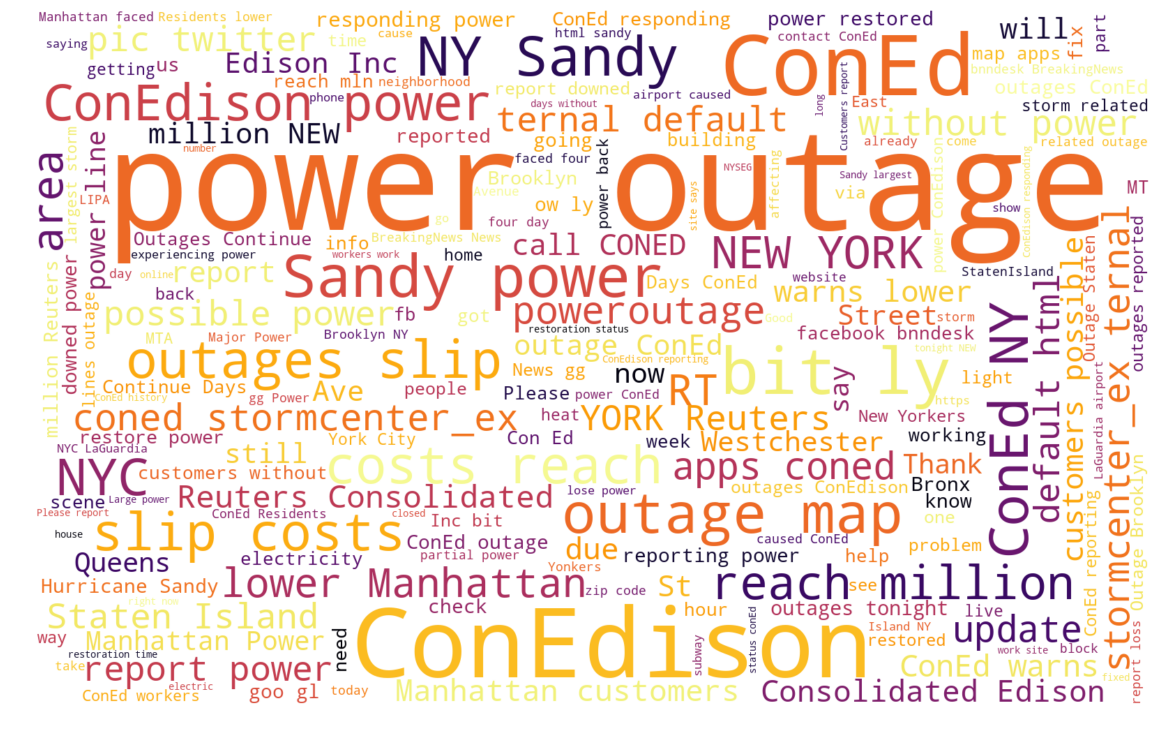

<Figure size 432x288 with 0 Axes>

In [132]:
# returns a word cloud of text 
text = df_2012_2017.text
text_string = []
# iterates over values assigned to notify_nyc
for i in df_2012_2017.text:
    text_string.append(i)
NOUN_string = pd.Series(text).str.cat(sep=' ')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='inferno', 
                      background_color='white').generate(NOUN_string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig('./images/wordcloud_text.png')

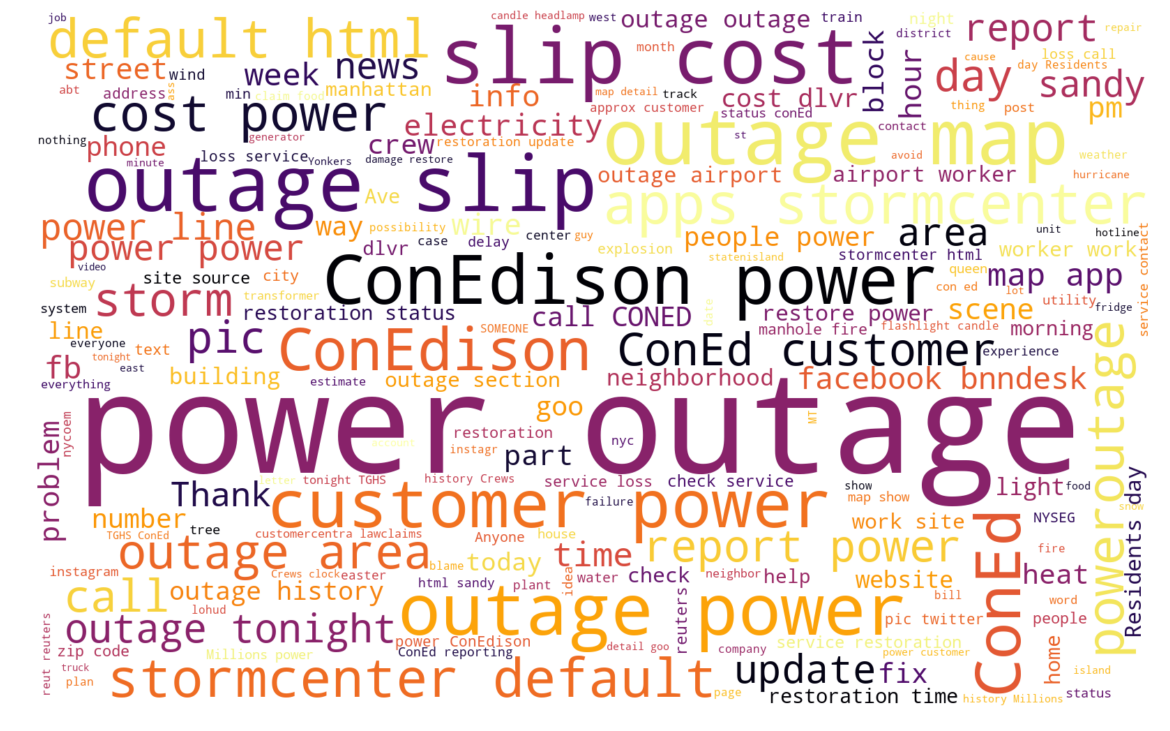

<Figure size 432x288 with 0 Axes>

In [109]:
# returns a word cloud of NOUNS 
NOUNS = df_2012_2017.nouns
NOUNS_string = []
# iterates over values assigned to notify_nyc
for i in df_2012_2017.nouns:
    NOUNS_string.append(i)
NOUN_string = pd.Series(NOUNS).str.cat(sep=' ')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='inferno', 
                      background_color='white').generate(NOUN_string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig('./images/wordcloud_nouns.png')

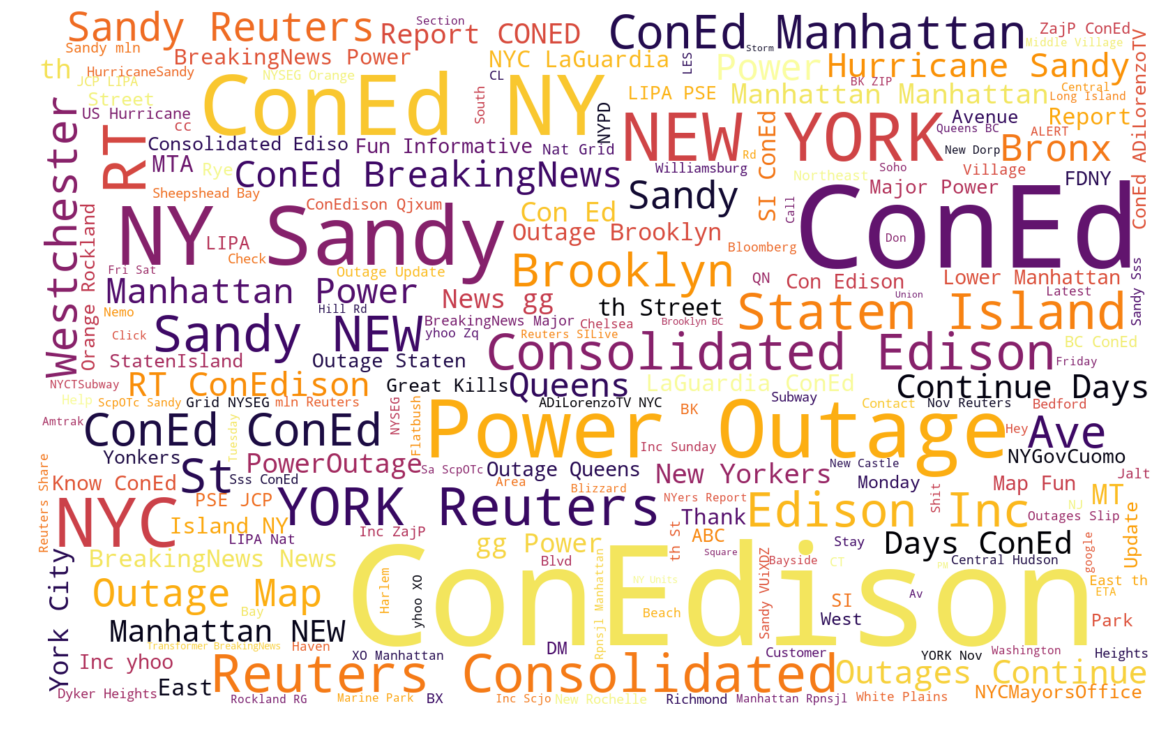

<Figure size 432x288 with 0 Axes>

In [110]:
# returns a word cloud of PROPER NOUNS 
PROPER_NOUNS = df_2012_2017.proper_nouns
PROPER_NOUNS_string = []
# iterates over values assigned to notify_nyc
for i in df_2012_2017.proper_nouns:
    PROPER_NOUNS_string.append(i)
PROPER_NOUN_string = pd.Series(PROPER_NOUNS).str.cat(sep=' ')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='inferno', 
                      background_color='white').generate(PROPER_NOUN_string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig('./images/wordcloud_proper_nouns.png')

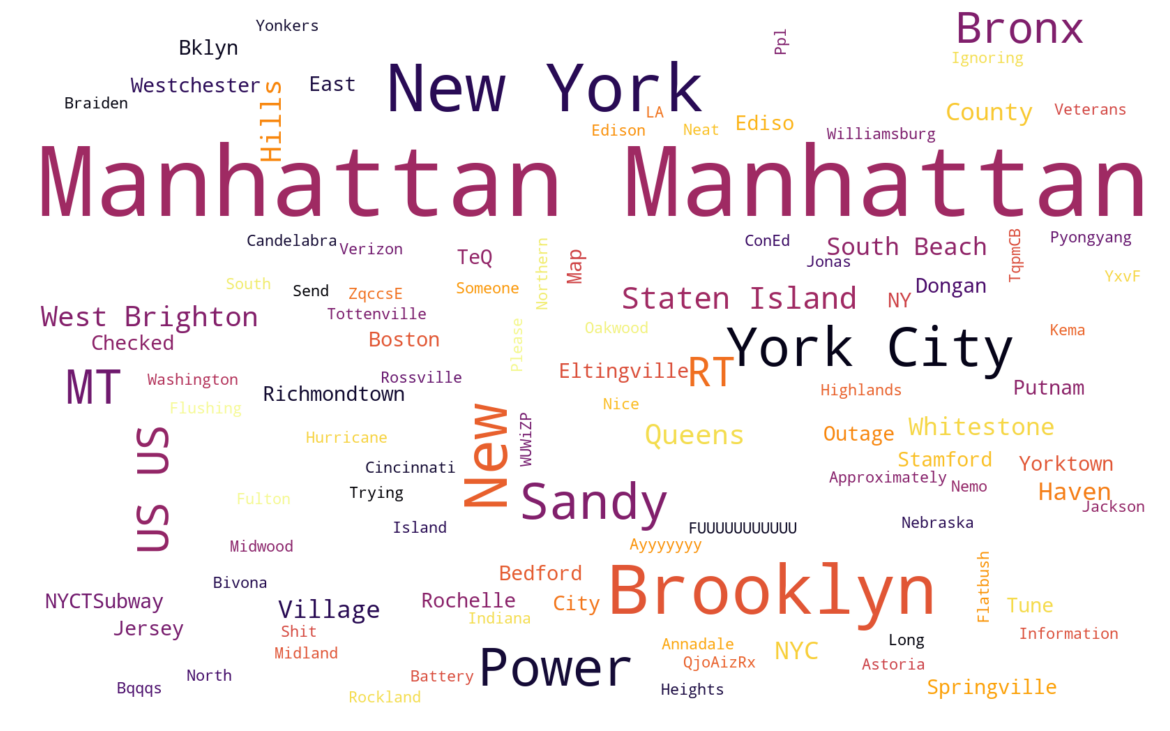

In [86]:
# returns a word cloud of GEOPOLITICAL ENTITIES 
GPE = df_2012_2017.geopolitical_ents
GPE_string = []
# iterates over values assigned to notify_nyc
for i in df_2012_2017.geopolitical_ents:
    GPE_string.append(i)
GPE_string = pd.Series(GPE).str.cat(sep=' ')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='inferno', 
                      background_color='white').generate(GPE_string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [112]:
from nltk.tokenize import RegexpTokenizer

In [113]:
# Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b') # Regex here says to get full words but exclude digits

# Tokenizer Tweets
dirty_tweet_tokens = [tokenizer.tokenize(token.lower().strip()) for token in df['text']]

# Initialize master list to populate
master_tweet_tokens = []

# For each dirty tweet, get list of clean tokens and append to master_tweet_tokens
for tweet in dirty_tweet_tokens:
    # Create template for clean tokens to populate for this particular tweet
    clean_tweet_tokens = []
    # For each word/token in tweet, make sure it is not a stopword or URL piece or main search term 
    for word in tweet:
        if ((word not in stopwords.words('english')) and (word not in ['http','https','www','com','@','...','…'])):
            # Now extract it into clean token list
            clean_tweet_tokens.append(word)
    # Append this list of tokens to the master list
    master_tweet_tokens.append(clean_tweet_tokens)

In [114]:
lst = master_tweet_tokens[0]
for sublist in master_tweet_tokens[1:]:
    lst.extend(sublist)

In [115]:
import nltk

In [116]:
fdist = nltk.FreqDist(lst)

In [117]:
fdist.most_common(20)

[('power', 4746),
 ('coned', 3748),
 ('outage', 2924),
 ('conedison', 2108),
 ('outages', 1530),
 ('report', 1296),
 ('responding', 1081),
 ('loss', 1015),
 ('service', 1009),
 ('nyc', 862),
 ('ly', 725),
 ('bit', 655),
 ('rt', 497),
 ('sandy', 495),
 ('zip', 494),
 ('map', 484),
 ('gov', 392),
 ('notifynyc', 371),
 ('con', 349),
 ('ny', 346)]

In [118]:
common = fdist.most_common(20)

In [119]:
word_freq = []
for word, freq in common:
    #print(word)
    common_words = {}
    common_words['words'] = word
    common_words['freq'] = freq
    word_freq.append(common_words)

In [120]:
common_words = pd.DataFrame(word_freq)

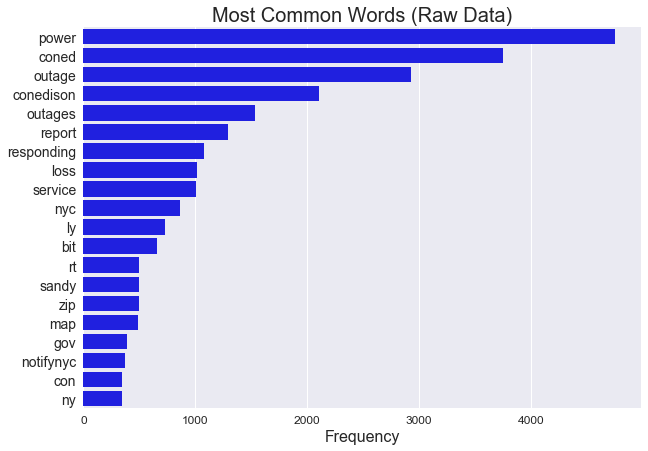

In [121]:
plt.figure(figsize=(10, 7))
sns.barplot(x = common_words['freq'],
            y = common_words['words'],  
            orient='h', color='b')
plt.title('Most Common Words (Raw Data)', fontsize=20)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.savefig('./images/most_common_words_raw_data.png');

In [122]:
# plt.figure(figsize = (9, 7))
# fdist.plot(20)

In [123]:
# Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b') # Regex here says to get full words but exclude digits

# Tokenizer Tweets
dirty_tweet_tokens = [tokenizer.tokenize(token.lower().strip()) for token in df_2012_2017['regex_clean_tweets']]

# Initialize master list to populate
master_tweet_tokens = []

# For each dirty tweet, get list of clean tokens and append to master_tweet_tokens
for tweet in dirty_tweet_tokens:
    # Create template for clean tokens to populate for this particular tweet
    clean_tweet_tokens = []
    # For each word/token in tweet, make sure it is not a stopword or URL piece or main search term 
    for word in tweet:
        if ((word not in stopwords.words('english')) and (word not in ['http','https','www','com','@','...','…', 'rt'])):
            # Now extract it into clean token list
            clean_tweet_tokens.append(word)
    # Append this list of tokens to the master list
    master_tweet_tokens.append(clean_tweet_tokens)

In [124]:
lst = master_tweet_tokens[0]
for sublist in master_tweet_tokens[1:]:
    lst.extend(sublist)

In [125]:
import nltk

In [126]:
fdist = nltk.FreqDist(lst)

In [127]:
common = fdist.most_common(20)

In [128]:
word_freq = []
for word, freq in common:
    #print(word)
    common_words = {}
    common_words['words'] = word
    common_words['freq'] = freq
    word_freq.append(common_words)

In [129]:
common_words = pd.DataFrame(word_freq)

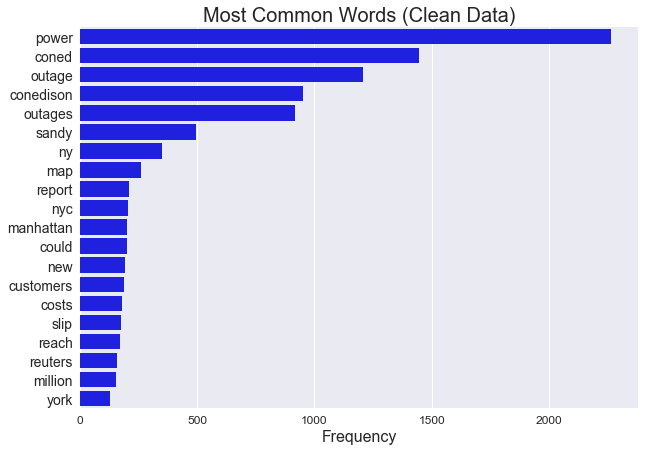

In [130]:
plt.figure(figsize=(10, 7))
sns.barplot(x = common_words['freq'],
            y = common_words['words'],  
            orient='h', color='b')
plt.title('Most Common Words (Clean Data)', fontsize=20)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.savefig('./images/most_common_words_clean_data.png');


In [106]:
# plt.figure(figsize=(10, 7))
# plt.barh(common_words['words'], common_words['freq'], )
# plt.xticks()

In [107]:
# plt.figure(figsize = (9, 7))
# fdist.plot(20)


In [131]:
!ls images

most_common_twitter_handles.png
most_common_words_clean_data.png
most_common_words_raw_data.png
outages_temp.png
outages_temp_snow.png
outages_temp_thunderstorms.png
outages_temp_thunderstorms_15_16.png
outages_temp_thunderstorms_15_17.png
outages_temp_thunderstorms_snow.png
outages_temp_thunderstorms_snow_15_16.png
outages_wind_speed.png
wordcloud_nouns.png
wordcloud_proper_nouns.png
